In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1.2

In [25]:
# Parameters for the grid

D  = 10**(-6) # diffusion constant
h = 1 # size along x
Nx = 251 # number of discretization points (including boundary points)
dt = 8 * D # timestep
t_final = 50000 * D # length of simulation

x_ax = np.linspace(0, h, Nx) # discretization along x
t_ax = np.arange(0, t_final + dt, dt) # discretization in time

dx = x_ax[1] - x_ax[0] # step along x


# Parameters for the equation

C0 = 0 # initial condition
left_D = 1 # at x = 0
right_D = 0 # at x = h

s = dt/(dx**2)
print(s)

0.5


In [26]:
grid = np.zeros([len(t_ax), len(x_ax)])
grid[0, :] = C0
grid[:, 0] = left_D
grid[:, -1] = right_D

for t in range(1, len(t_ax)):
    for x in range(1, len(x_ax) -1):
        grid[t, x] = s * (grid[t-1, x+1] - 2*grid[t-1, x] + grid[t-1, x-1]) + grid[t-1, x]


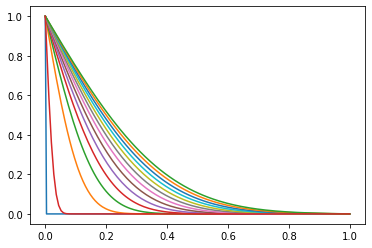

In [27]:
for t in range(0, len(t_ax)):
    if t%500 == 0:
            plt.plot(x_ax, grid[t, :])
plt.plot(x_ax, grid[30, :])

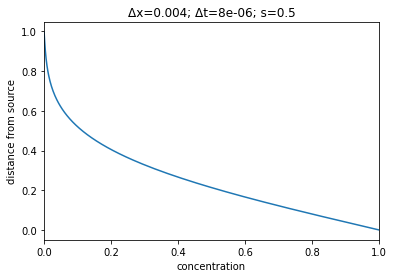

In [28]:
plt.plot(grid[-1,0:Nx-1],x_ax[0:Nx-1])
plt.xlabel('concentration')
plt.ylabel('distance from source')
plt.xlim(0,1)
plt.title('Δx={}; Δt={}; s={}'.format(dx,dt,s))
plt.savefig('Task_1.2 concentration_distance s={}.png'.format(s))